<a href="https://colab.research.google.com/github/neurorishika/PSST/blob/master/Tutorial/Day%201%20Of%20Numerical%20Integration%20and%20Python/Day%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neurorishika/PSST/master/Tutorial/Day%201%20Of%20Numerical%20Integration%20and%20Python/Day%201.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

## Day 1: Of Numerical Integration and Python

Welcome to Day 1! Today, we start with our discussion of Numerical Integration.

### What is Numerical Integration?

$$\frac{dx}{dt} = f(x, t)$$
where, $x$ is an $N-$dimensional vector and $t$ typically stands for time. The function $f(x,t)$ may be a nonlinear function of $x$ that explicitly depends on $t$. In addition to specifying the form of the differential equation, one must also specify the value of $x$ at a particular time point. Say, $x=x_{0}$ at $t = t_0$. It is often not possible to derive a closed form solution for this equation. Therefore numerical methods to solve these equations are of great importance. 

#### Euler's Method for Numerical Integration

We use Euler's Method to generate a numerical solution to an initial value problem of the form:

$$\frac{dx}{dt} = f(x, t)$$
$$x(t_o) = x_o$$

Firstly, we decide the interval over which we desire to find the solution, starting at the initial condition. We break this interval into small subdivisions of a fixed length $\epsilon$. Then, using the initial condition as our starting point, we generate the rest of the solution by using the iterative formulas:

$$t_{n+1} = t_n + \epsilon$$
$$x_{n+1} = x_n + \epsilon f(x_n, t_n)$$

to find the coordinates of the points in our numerical solution. We end this process once we have reached the end of the desired interval.

The best way to understand how it works is from the following diagram:

<img src="https://raw.githubusercontent.com/neurorishika/PSST/master/Tutorial/Day%201%20Of%20Numerical%20Integration%20and%20Python/euler.svg" width="600"/>

#### Euler's Method in Python
Let $\frac{dx}{dt}=f(x,t)$, we want to find $x(t)$ over $t\in[0,2)$, given that $x(0)=1$ and $f(x,t) = 5x$. The exact solution of this equation would be $x(t) = e^{5t}$.


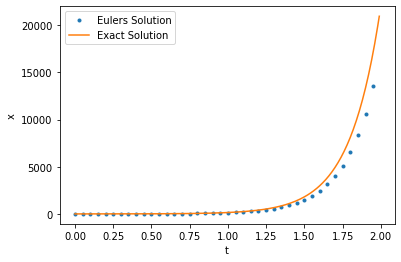

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x,t): # define the function f(x,t)
    return 5*x

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
x = np.zeros(t.shape) # define an array for x

x[0]= 1 # set initial condition

for i in range(1,t.shape[0]):
    x[i] = epsilon*f(x[i-1],t[i-1])+x[i-1] # Euler Integration Step

plt.plot(t[::5],x[::5],".",label="Eulers Solution")
plt.plot(t,np.exp(5*t),label="Exact Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### Euler and Vectors

Euler's Method also applies to vectors and can solve simultaneous differential equations.

The Initial Value problem now becomes:

$$\frac{d\vec{X}}{dt} = \vec{f}(\vec{X}, t)$$
$$\vec{X}(t_o) = \vec{X_o}$$

where $\vec{X}=[X_1,X_2...]$ and $\vec{f}(\vec{X}, t)=[f_1(\vec{X}, t),f_2(\vec{X}, t)...]$.

The Euler's Method becomes:

$$t_{n+1} = t_n + \epsilon$$
$$\vec{X_{n+1}} = \vec{X_n} + \epsilon \vec{f}(\vec{X_n}, t_n)$$

Let $\frac{d\vec{X}}{dt}=f(\vec{X},t)$, we want to find $\vec{X}(t)$ over $t\in[0,2)$, given that $\vec{X}(t)=[x,y]$, $\vec{X}(0)=[1,0]$ and $f(\vec{X},t) = [x-y,y-x]$.

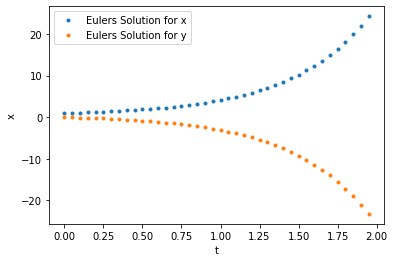

In [ ]:
def f(X,t): # the function f(X,t) now takes a vector X as input
    x,y = X # the first and the second elements of X are assigned to x and y
    return np.array([x-y,y-x])

epsilon = 0.01 # define timestep

t = np.arange(0,2,epsilon) # define an array for t
X = np.zeros((2,t.shape[0])) # initialize an array for x

X[:,0]= [1,0] # set initial condition

for i in range(1,t.shape[0]):
    X[:,i] = epsilon*f(X[:,i-1],t[i-1])+X[:,i-1] # Euler Integration Step
    
plt.plot(t[::5],X[0,::5],".",label="Eulers Solution for x")
plt.plot(t[::5],X[1,::5],".",label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

#### A Generalized function for Euler Integration

Here we rewrite the code in a modular fashion and cast the integrator as a function that takes in 3 inputs ie. the function $\vec{f}(\vec{y},t)$ where $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and initial vector $\vec{y}_{0}$. We will find this form to be particularly useful when we use TensorFlow functions to code the integrator. Further, it allows us to write multiple integrating functions (for example Euler or RK4) within the same class and call a specific integrator as needed. In addition we also introduce a function to ensure that the correct inputs are given to the integrator failing which an error message is generated. 
##### Algorithm
- Get the required inputs: function $\vec{f}(\vec{y},t)$, initial condition vector $\vec{y}_0$ and time series $t$. Entering a time series $t$ allows for greater control over $\epsilon$ as it can now vary for each timestep. 
- Check if the input is of the correct datatype ie. floating point decimal.
- Allocate a matrix to hold the output.
- At each time step, perform the update $\vec{y}$ using the Euler method with and store it in the output matrix.
- Return the output time series [number of equations $\times$ iterations] matrix.

In [ ]:
def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0
        
        for i in range(time_delta_grid.shape[0]):
            y[:,i+1]= time_delta_grid[i]*func(y[:,i],t[i])+y[:,i]
        return y

def odeint_euler(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


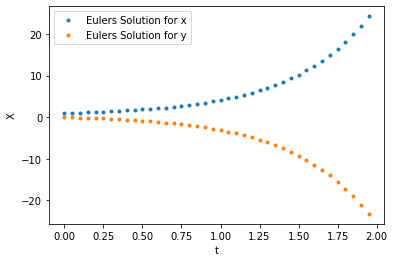

In [ ]:
solution = odeint_euler(f,[1.,0.],t)

plt.plot(t[::5],solution[0,::5],".",label="Eulers Solution for x")
plt.plot(t[::5],solution[1,::5],".",label="Eulers Solution for y")
plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.show()

####  Runge-Kutta Methods for Numerical Integration

Euler's method $x_{n+1}=x_n + \epsilon f(x_n,t_n)$ calculates the solution at $t_{n+1}=t_n+\epsilon$ given the solution at $t_n$. In doing so we use the derivative at $t_{n}$ though its value may change throughout the interval $[t,t+\epsilon]$.  This results in an error of the order $\mathcal{O}(\epsilon^2)$. By calculating the derivatives at intermediate steps, one can reduce the error at each step. Consider the following second order method where the slope is calculated at $t_{n}$ and $t_n+\frac{\epsilon}{2}$.

\begin{eqnarray}k_1=\epsilon f(x_n,t_n)\end{eqnarray}
\begin{eqnarray}k_2=\epsilon f(x_n+\frac{k_1}{2},t_n+\frac{\epsilon}{2})\end{eqnarray}
\begin{eqnarray}x_{n+1}=x_n+k_2+O(\epsilon^3)\end{eqnarray}


This method is called the second order Runge-Kutta method or the midpoint method.

<img src="https://raw.githubusercontent.com/neurorishika/PSST/master/Tutorial/Day%201%20Of%20Numerical%20Integration%20and%20Python/rk2.svg" width="600"/>

Above is a schematic description of the second order Runge-Kutta method. The blue curve denotes a solution of some differential equation. 

We can reduce errors by calculating additional derivatives. One of the most commonly used integrators is the fourth-order Runge-Kutta Method or RK4 method, that is implemented below:

\begin{eqnarray}k_1=f(x_n,t_n)\end{eqnarray}
\begin{eqnarray}k_2=f(x_n+\epsilon\frac{k_1}{2},t_n+\frac{\epsilon}{2})\end{eqnarray}
\begin{eqnarray}k_3=f(x_n+\epsilon\frac{k_2}{2},t_n+\frac{\epsilon}{2})\end{eqnarray}
\begin{eqnarray}k_4=f(x_n+\epsilon k_3,t_n+\epsilon)\end{eqnarray}
\begin{eqnarray}y_{n+1}=y_n+\frac{\epsilon}{6}(k_1+2 k_2+2 k_3+k_4)+\mathcal{O}(\epsilon^5)\end{eqnarray}

Note that this numerical method is again easily converted to a vector algorithm by simply replacing $x_i$ by the vector $\vec{X_i}$. We will use this method to simulate networks of neurons.

#### Generalized RK4 Method in Python

We can now modify the Euler Integration code implemented earlier with a generalized function for RK4 that takes three inputs - the function $f(\vec{y},t)$, where $\frac{d\vec{y}}{dt}=f(\vec{y},t)$, the time array, and an initial vector $\vec{y_0}$. The code can be updated as follows,



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


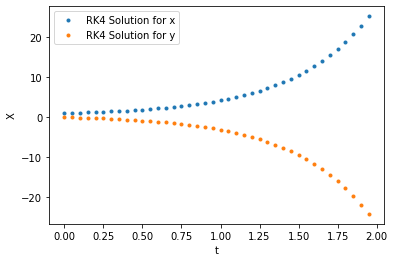

In [ ]:
def check_type(y,t): # Ensure Input is Correct
    return y.dtype == np.floating and t.dtype == np.floating

class _Integrator():
    
    def integrate(self,func,y0,t):
        time_delta_grid = t[1:] - t[:-1]
        
        y = np.zeros((y0.shape[0],t.shape[0]))
        y[:,0] = y0

        for i in range(time_delta_grid.shape[0]):
            k1 = func(y[:,i], t[i])# RK4 Integration Steps replace Euler's Updation Steps
            half_step = t[i] + time_delta_grid[i] / 2
            k2 = func(y[:,i] + time_delta_grid[i] * k1 / 2, half_step)
            k3 = func(y[:,i] + time_delta_grid[i] * k2 / 2, half_step)
            k4 = func(y[:,i] + time_delta_grid[i] * k3, t + time_delta_grid[i])
            y[:,i+1]= (k1 + 2 * k2 + 2 * k3 + k4) * (time_delta_grid[i] / 6) + y[:,i]
        return y

def odeint_rk4(func,y0,t):
    y0 = np.array(y0)
    t = np.array(t)
    if check_type(y0,t):
        return _Integrator().integrate(func,y0,t)
    else:
        print("error encountered")

solution = odeint_rk4(f,[1.,0.],t)

plt.plot(t[::5],solution[0,::5],".",label="RK4 Solution for x")
plt.plot(t[::5],solution[1,::5],".",label="RK4 Solution for y")
plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.show()

**Exercise**, Solve the differential equations describing the dynamics of a simple pendulum the using Euler and RK4 methods. The equation of motion of a simple pendulum is given by: 
\begin{eqnarray}\frac{d^2s}{dt^2}=L\frac{d^2\theta}{dt^2}=-g\sin{\theta}\end{eqnarray}
where $L$ = Length of String and $\theta$ = angle made with vertical. This second order differential equation may be written as two first order coupled equations as follows:
\begin{eqnarray}\frac{d\theta}{dt}=\omega\end{eqnarray}
\begin{eqnarray}\frac{d\omega}{dt}=-\frac{g}{L}\sin{\theta}\end{eqnarray}